In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

## Original USDM dataset

In [14]:
df = pd.read_csv('./ByCounty.csv', parse_dates=True, low_memory=False)

In [15]:
# drop non-CONUS US

indexes = df[(df['State'] == 'AK') | (df['State'] == 'HI') | (df['State'] == 'PR') ].index
df.drop(indexes,inplace=True)

In [16]:
# get weighted sum
df['wsum'] = df.D0*1 + df.D1*2 + df.D2*3 + df.D3*4 + df.D4*5

In [17]:
# view dataset
df

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,wsum
15930,20220222,1001,Autauga County,AL,100.0,0.0,0.0,0.0,0.0,0.0,2022-02-22,2022-02-28,1,0.0
15931,20220215,1001,Autauga County,AL,100.0,0.0,0.0,0.0,0.0,0.0,2022-02-15,2022-02-21,1,0.0
15932,20220208,1001,Autauga County,AL,100.0,0.0,0.0,0.0,0.0,0.0,2022-02-08,2022-02-14,1,0.0
15933,20220201,1001,Autauga County,AL,100.0,0.0,0.0,0.0,0.0,0.0,2022-02-01,2022-02-07,1,0.0
15934,20220125,1001,Autauga County,AL,100.0,0.0,0.0,0.0,0.0,0.0,2022-01-25,2022-01-31,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710346,20120124,56045,Weston County,WY,100.0,0.0,0.0,0.0,0.0,0.0,2012-01-24,2012-01-30,1,0.0
1710347,20120117,56045,Weston County,WY,100.0,0.0,0.0,0.0,0.0,0.0,2012-01-17,2012-01-23,1,0.0
1710348,20120110,56045,Weston County,WY,100.0,0.0,0.0,0.0,0.0,0.0,2012-01-10,2012-01-16,1,0.0
1710349,20120103,56045,Weston County,WY,100.0,0.0,0.0,0.0,0.0,0.0,2012-01-03,2012-01-09,1,0.0


In [18]:
df['MapDate']= pd.to_datetime(df['MapDate'],format='%Y%m%d')

In [19]:
df.MapDate

15930     2022-02-22
15931     2022-02-15
15932     2022-02-08
15933     2022-02-01
15934     2022-01-25
             ...    
1710346   2012-01-24
1710347   2012-01-17
1710348   2012-01-10
1710349   2012-01-03
1710350   2011-12-27
Name: MapDate, Length: 1650348, dtype: datetime64[ns]

In [20]:
df.shape

(1650348, 14)

In [67]:
df

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,wsum,Region
15930,2022-02-22,1001,Autauga County,AL,100.0,0.0,0.0,0.0,0.0,0.0,2022-02-22,2022-02-28,1,0.0,Southeast
15931,2022-02-15,1001,Autauga County,AL,100.0,0.0,0.0,0.0,0.0,0.0,2022-02-15,2022-02-21,1,0.0,Southeast
15932,2022-02-08,1001,Autauga County,AL,100.0,0.0,0.0,0.0,0.0,0.0,2022-02-08,2022-02-14,1,0.0,Southeast
15933,2022-02-01,1001,Autauga County,AL,100.0,0.0,0.0,0.0,0.0,0.0,2022-02-01,2022-02-07,1,0.0,Southeast
15934,2022-01-25,1001,Autauga County,AL,100.0,0.0,0.0,0.0,0.0,0.0,2022-01-25,2022-01-31,1,0.0,Southeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710346,2012-01-24,56045,Weston County,WY,100.0,0.0,0.0,0.0,0.0,0.0,2012-01-24,2012-01-30,1,0.0,NorthernRR
1710347,2012-01-17,56045,Weston County,WY,100.0,0.0,0.0,0.0,0.0,0.0,2012-01-17,2012-01-23,1,0.0,NorthernRR
1710348,2012-01-10,56045,Weston County,WY,100.0,0.0,0.0,0.0,0.0,0.0,2012-01-10,2012-01-16,1,0.0,NorthernRR
1710349,2012-01-03,56045,Weston County,WY,100.0,0.0,0.0,0.0,0.0,0.0,2012-01-03,2012-01-09,1,0.0,NorthernRR


## Sampling Ideas #1- Random Random Sample


In [179]:
# sampling idea #1:
# output county names, sample 300 counties (1/10) with WHOLE time range 

county_list = df.FIPS.unique()
county_select = np.random.choice(county_list,300,replace=False)
county_select

array([48507, 20083, 48505, 13189, 20111, 26077, 20061,  8065, 37145,
       53041, 51153, 39171, 31165, 13143, 21227, 37197, 21169, 48117,
       27019, 18129, 17065, 21125,  5085, 27163, 19139, 31179, 37189,
       12103, 37097, 22007, 16047,  6113, 48041, 29051, 53035, 20029,
        1103, 34001, 42091, 29097, 48333, 17015, 47177, 28003, 13163,
       17111, 45039, 21077, 13287, 27101, 13119, 20191, 39155, 46135,
       29217,  5059, 50023, 28115,  8095, 38021, 29037, 51775, 20083,
       48383,  8053, 48353, 48185, 42051, 26015, 37173, 46125, 48463,
       42121, 17125, 31017, 24033, 28047, 47075, 49045, 48449, 37159,
       32023, 51093, 34005, 31003, 35005, 25019, 19131, 48169, 20195,
       37165, 17011,  8019, 47153, 28133, 39053, 12021, 37101, 13191,
       16039, 37115, 13253, 39085, 48335, 37155, 55039, 51595, 51171,
       26113, 54011, 13103, 17059, 54037, 13163, 17157, 21047,  5115,
       39117, 20029,  6057, 47175, 30101, 51131, 40035, 18049,  1043,
       42071, 13009,

In [191]:
column_names = df.columns.values.tolist()
df_sample = pd.DataFrame(columns=column_names)
df_sample

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,wsum


In [202]:
for fips in county_select:
    temp = df[df['FIPS'] == fips]
    df_sample = pd.concat([df_sample,temp])

In [203]:
df_sample

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,wsum
1516005,2022-02-22,48507,Zavala County,TX,0.0,100.0,100.0,88.16,21.55,0.0,2022-02-22,2022-02-28,1,650.68
1516006,2022-02-15,48507,Zavala County,TX,0.0,100.0,100.0,88.16,21.55,0.0,2022-02-15,2022-02-21,1,650.68
1516007,2022-02-08,48507,Zavala County,TX,0.0,100.0,100.0,88.16,21.55,0.0,2022-02-08,2022-02-14,1,650.68
1516008,2022-02-01,48507,Zavala County,TX,0.0,100.0,100.0,100.00,21.55,0.0,2022-02-01,2022-02-07,1,686.20
1516009,2022-01-25,48507,Zavala County,TX,0.0,100.0,100.0,100.00,21.55,0.0,2022-01-25,2022-01-31,1,686.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367851,2012-01-24,47137,Pickett County,TN,100.0,0.0,0.0,0.00,0.00,0.0,2012-01-24,2012-01-30,1,0.00
1367852,2012-01-17,47137,Pickett County,TN,100.0,0.0,0.0,0.00,0.00,0.0,2012-01-17,2012-01-23,1,0.00
1367853,2012-01-10,47137,Pickett County,TN,100.0,0.0,0.0,0.00,0.00,0.0,2012-01-10,2012-01-16,1,0.00
1367854,2012-01-03,47137,Pickett County,TN,100.0,0.0,0.0,0.00,0.00,0.0,2012-01-03,2012-01-09,1,0.00


In [231]:
# if want to save
# df_sample.to_csv('./ByCounty_Sample.csv')

### EDA

In [204]:
df_sample = df_sample.sort_values(by=['FIPS','MapDate'],ascending=[True,True])

In [205]:
df_sample['FIPS STR'] = 'NA'

In [206]:
for index, row in df_sample.iterrows():
    df_sample.at[index,'FIPS STR']=str(row['FIPS'])

In [207]:
value = df_sample['FIPS'].unique()
np.random.choice(value,20)

array([21235, 24033, 1021, 31021, 51033, 16005, 36079, 37189, 20111,
       47181, 55013, 13123, 17015, 5063, 4021, 48169, 35031, 1093, 12086,
       17157], dtype=object)

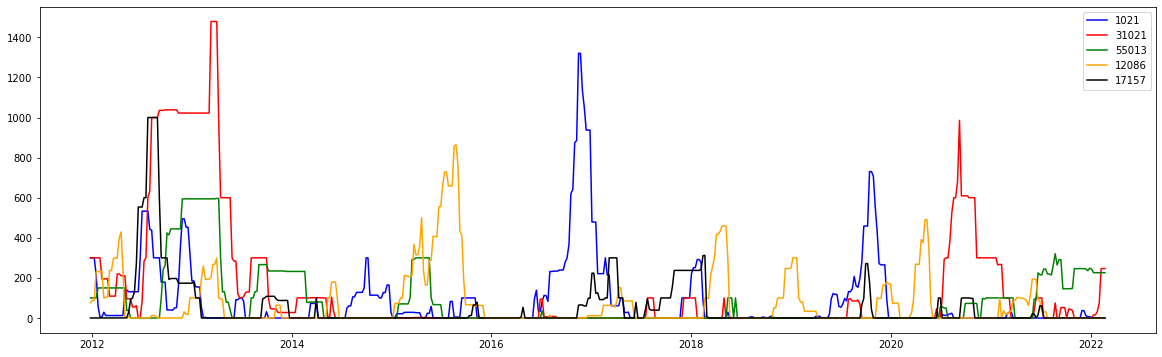

In [208]:
# for sample dataset
example = {'1021':'blue','31021':'red','55013':'green','12086':'orange','17157':'black'}
plt.figure(figsize=(20,6))
for county, color in example.items():
    df_sub = df_sample[df_sample['FIPS STR'] == county]
    plt.plot(df_sub.MapDate,df_sub.wsum,color=color,label=county)
    plt.legend(loc='best')

plt.show()

Text(0.5, 1.0, 'Chilton County, AL')

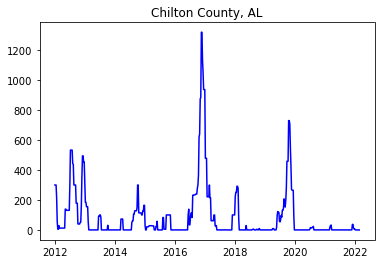

In [218]:
df_sub_1021 = df_sample[df_sample['FIPS STR'] == '1021']
plt.plot(df_sub_1021.MapDate,df_sub_1021.wsum,color = 'blue',label='1021')
plt.title('Chilton County, AL')

Text(0.5, 1.0, 'Burnett County, WI')

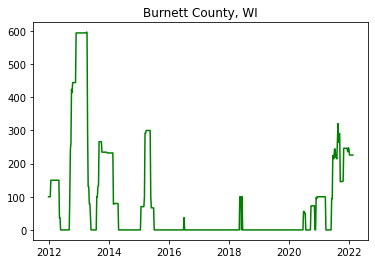

In [220]:
df_sub_55013 = df_sample[df_sample['FIPS STR'] == '55013']
plt.plot(df_sub_55013.MapDate,df_sub_55013.wsum,color='green',label='55013')
plt.title('Burnett County, WI')

### Fairness? Representation?

In [221]:
# examine fairness:

df_sample.State.unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA',
       'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'],
      dtype=object)

In [226]:
sumsum = df_sample.groupby('State').count()
sumsum

,MapDate,FIPS,County,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,wsum,FIPS STR
State,,,,,,,,,,,,,,
AL,3186,3186,3186,3186,3186,3186,3186,3186,3186,3186,3186,3186,3186,3186
AR,3717,3717,3717,3717,3717,3717,3717,3717,3717,3717,3717,3717,3717,3717
AZ,531,531,531,531,531,531,531,531,531,531,531,531,531,531
CA,2124,2124,2124,2124,2124,2124,2124,2124,2124,2124,2124,2124,2124,2124
CO,2655,2655,2655,2655,2655,2655,2655,2655,2655,2655,2655,2655,2655,2655
FL,3186,3186,3186,3186,3186,3186,3186,3186,3186,3186,3186,3186,3186,3186
GA,10620,10620,10620,10620,10620,10620,10620,10620,10620,10620,10620,10620,10620,10620
IA,4248,4248,4248,4248,4248,4248,4248,4248,4248,4248,4248,4248,4248,4248
ID,2655,2655,2655,2655,2655,2655,2655,2655,2655,2655,2655,2655,2655,2655


In [224]:
len(df_sample.MapDate.unique())

531

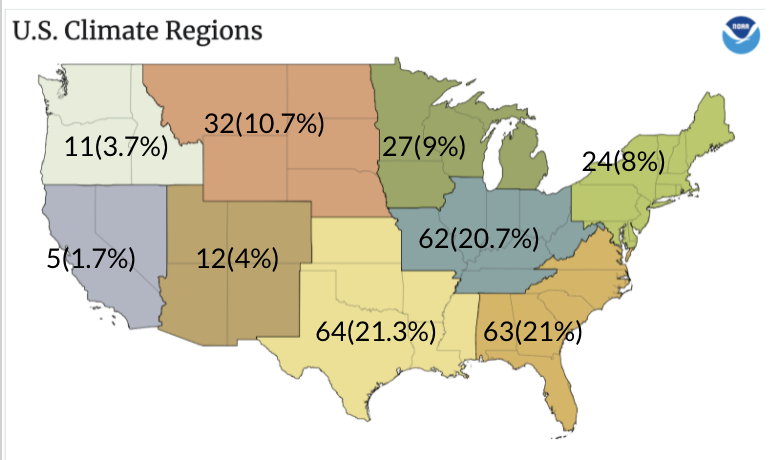

## Sampling Idea #2 - Stratified Random Sampling


In [21]:
# climate regions
region_list = ['Northeast', 'UpperMidwest', 'OhioValley', 'Southeast', 'NorthernRR', 'South', 'Southwest', 'Northwest', 'West']

Northeast = ['CT','DE','ME','MD','MA','NH','NJ','NY','PA','RI','VT']
UpperMidwest = ['IA','MI','MN','WI']
OhioValley = ['IL','IN','KY','MO','OH','TN','WV']
Southeast = ['AL','FL','GA','NC','SC','VA']
NorthernRR = ['MT','NE','ND','SD','WY']
South = ['AR','KS','LA','MS','OK','TX']
Southwest = ['AZ','CO','NM','UT']
Northwest = ['ID','OR','WA']
West = ['CA','NV']

df['Region'] = 'NA'
df['Region'] = df['State'].apply(lambda x: "Northeast" if x in Northeast else 'UpperMidwest' if x in UpperMidwest\
                                         else 'OhioValley' if x in OhioValley else 'Southeast' if x in Southeast\
                                         else 'NorthernRR' if x in NorthernRR else 'South' if x in South\
                                         else 'Southwest' if x in Southwest else 'Northwest' if x in Northwest\
                                         else 'West' if x in West else 'NA')

In [164]:
df_sample2 = pd.DataFrame(columns=df.columns)

# May exist multiple counties with the same name
# use FIPS as index
for region in region_list:
    FIPS_in_region = df[df.Region == region].FIPS.unique()
    sample_fips = np.random.choice(FIPS_in_region,50,replace=False)
    for fips in sample_fips:
            temp = df[df['FIPS'] == fips]
            df_sample2 = pd.concat([df_sample2,temp])
            
# Sort the df_sample2 in ascending order        
df_sample2 = df_sample2.sort_values(by=['FIPS','MapDate'],ascending=[True,True])

In [167]:
# Construct the column of FIPS STR
df_sample2['FIPS STR']=df_sample2.FIPS.apply(lambda x:str(x))

len(df_sample2['FIPS STR'].unique())

450

In [ ]:
# if want to save
# df_sample2.to_csv('./ByCounty_Sample2.csv')

## Appendix

### Different Drought level  in CONUS US

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df.MapDate,df.D0,color='blue',label='D0')
plt.fill_between(df.MapDate,df.D0,color='blue',alpha=0.1)
plt.plot(df.MapDate,df.D1,color='red',label='D1')
plt.fill_between(df.MapDate,df.D1,color='red',alpha=0.2)
plt.plot(df.MapDate,df.D2,color='green',label='D2')
plt.fill_between(df.MapDate,df.D2,color='green',alpha=0.3)
plt.plot(df.MapDate,df.D3,color='orange',label='D3')
plt.fill_between(df.MapDate,df.D3,color='orange',alpha=0.4)
plt.plot(df.MapDate,df.D4,color='black',label='D4')
plt.fill_between(df.MapDate,df.D4,color='grey',alpha=0.5)
plt.legend(loc='best')

So this is a replication of CONUS US time series plot for different drought levels. We can choose different time windows:

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df.MapDate,df.D0,color='blue',label='D0')
plt.fill_between(df.MapDate,df.D0,color='blue',alpha=0.1)
plt.plot(df.MapDate,df.D1,color='red',label='D1')
plt.fill_between(df.MapDate,df.D1,color='red',alpha=0.2)
plt.plot(df.MapDate,df.D2,color='green',label='D2')
plt.fill_between(df.MapDate,df.D2,color='green',alpha=0.3)
plt.plot(df.MapDate,df.D3,color='orange',label='D3')
plt.fill_between(df.MapDate,df.D3,color='orange',alpha=0.4)
plt.plot(df.MapDate,df.D4,color='black',label='D4')
plt.fill_between(df.MapDate,df.D4,color='grey',alpha=0.5)
plt.legend(loc='best')
plt.xlim(pd.Timestamp('2012-02-22'), pd.Timestamp('2022-02-01'))

### Single Drought Level by State

In [13]:
path2 = '/Users/yujiecai/Desktop/Harvard_University/Spring2022/AC297R/USDM Data/ByState.csv'

In [14]:
df2 = pd.read_csv(path2, parse_dates=True, low_memory=False)

In [15]:
df2

,MapDate,StateAbbreviation,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20220215,AK,100.00,0.00,0.0,0.0,0.0,0.0,2022-02-15,2022-02-21,1
1,20220208,AK,100.00,0.00,0.0,0.0,0.0,0.0,2022-02-08,2022-02-14,1
2,20220201,AK,100.00,0.00,0.0,0.0,0.0,0.0,2022-02-01,2022-02-07,1
3,20220125,AK,100.00,0.00,0.0,0.0,0.0,0.0,2022-01-25,2022-01-31,1
4,20220118,AK,100.00,0.00,0.0,0.0,0.0,0.0,2022-01-18,2022-01-24,1
...,...,...,...,...,...,...,...,...,...,...,...
60055,20000201,WY,100.00,0.00,0.0,0.0,0.0,0.0,2000-02-01,2000-02-07,1
60056,20000125,WY,85.98,14.02,0.0,0.0,0.0,0.0,2000-01-25,2000-01-31,1
60057,20000118,WY,100.00,0.00,0.0,0.0,0.0,0.0,2000-01-18,2000-01-24,1
60058,20000111,WY,100.00,0.00,0.0,0.0,0.0,0.0,2000-01-11,2000-01-17,1


In [16]:
df2['MapDate']= pd.to_datetime(df2['MapDate'],format='%Y%m%d')

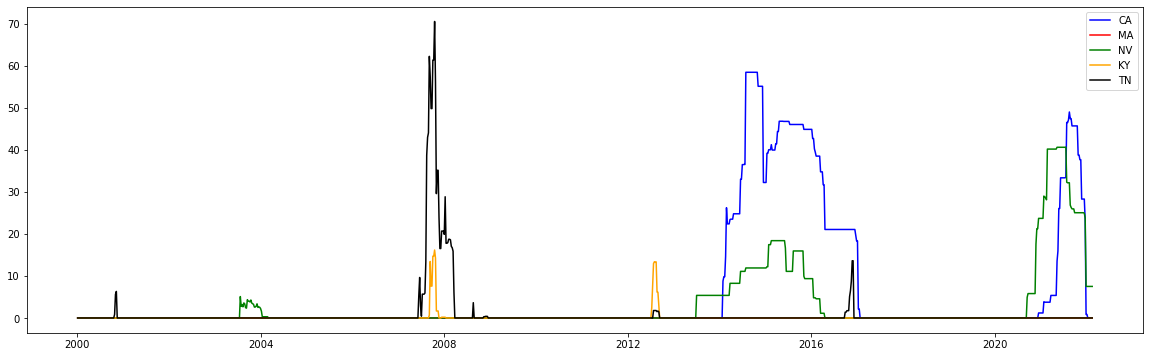

In [17]:
example = {'CA':'blue','MA':'red','NV':'green','KY':'orange','TN':'black'}
plt.figure(figsize=(20,6))
for state, color in example.items():
    df_sub = df2[df2.StateAbbreviation == state]
    plt.plot(df_sub.MapDate,df_sub.D4,color=color,label=state)
    plt.legend(loc='best')

plt.show()
  

We are showing Exceptional Drought (D4) for five states, CA, MA, NV, KY, TN. MA does not have this category, peak for TN in 2008, KY is less severe, lots of increase for NV and CA in past ten years